In [1]:
from gp_2D import *

In [2]:
input_file = '../training_results/2D/train_inputs_all.json'
var_file = '../training_results/2D/train_outputs_var_all.json'
output_file = '../training_results/2D/train_outputs_mean_all.json'
output_type = 'P'


In [3]:
gp = LPI_GP_2D(input_file=input_file, output_file=output_file,\
               output_type=output_type, var_file=var_file, train_frac = 0.1)


In [4]:
gp.set_training_data()

In [5]:
gp.optimise_noise_GP()

l1 =  0.21544346900318845 l2 =  2.782559402207126 var =  0.7742636826811278


In [6]:
gp.optimise_GP()

l1 =  0.2782559402207124 l2 =  2.1544346900318834 var =  0.46415888336127786


In [7]:
N = 1000
Ln_300 = np.ones(N)*300e-6
Ln_500 = np.ones(N)*500e-6
Ln_1000 = np.ones(N)*1000e-6
I = np.geomspace(1e14, 1e16, N)
X_300 = []
X_500 = []
X_1000 = []
for i in range(N):
        X_300.append([I[i], Ln_300[i]])
        X_500.append([I[i], Ln_500[i]])
        X_1000.append([I[i], Ln_1000[i]])

X_300 = np.array(X_300)
X_500 = np.array(X_500)
X_1000 = np.array(X_1000)

In [8]:
Y_300, Var_epi_300, Var_noise_300 = gp.GP_predict(X_300, get_var=True)
Y_500, Var_epi_500, Var_noise_500 = gp.GP_predict(X_500, get_var=True)
Y_1000, Var_epi_1000, Var_noise_1000 = gp.GP_predict(X_1000, get_var=True)

In [9]:
err_300 = 2.0*np.sqrt(Var_epi_300 + Var_noise_300)
err_500 = 2.0*np.sqrt(Var_epi_500 + Var_noise_500)
err_1000 = 2.0*np.sqrt(Var_epi_300 + Var_noise_1000)

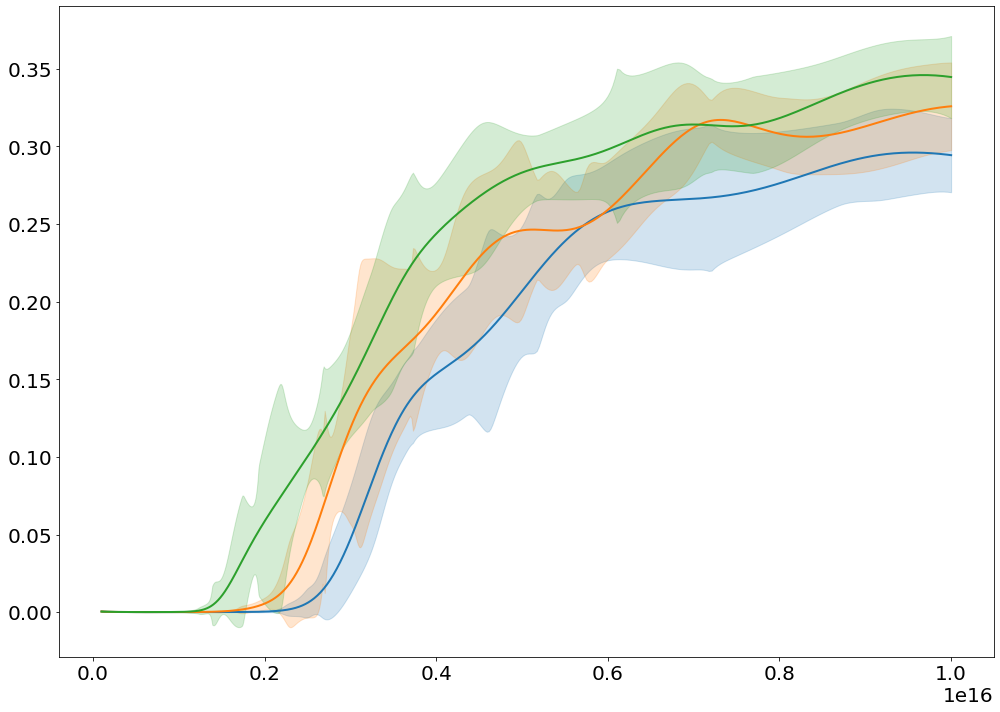

In [10]:
plt.plot(X_300[:,0].flatten(), Y_300.flatten(), color = 'C0')
plt.plot(X_500[:,0].flatten(), Y_500.flatten(), color = 'C1')
plt.plot(X_1000[:,0].flatten(), Y_1000.flatten(), color = 'C2')

plt.fill_between(X_300[:,0].flatten(), Y_300-err_300, Y_300+err_300, alpha = 0.2, color = 'C0')
plt.fill_between(X_500[:,0].flatten(), Y_500.flatten()-err_500, Y_500.flatten()+err_500, alpha = 0.2, color = 'C1')
plt.fill_between(X_1000[:,0].flatten(), Y_1000.flatten()-err_1000, Y_1000.flatten()+err_1000, alpha = 0.2, color = 'C2')

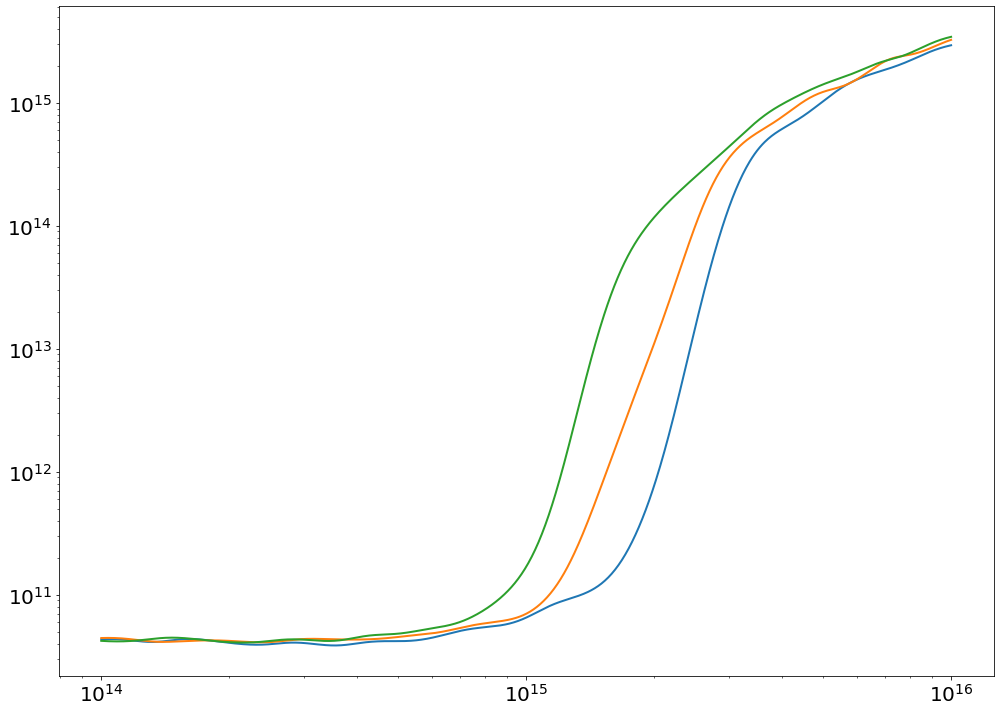

In [11]:
plt.loglog(X_300[:,0].flatten(), Y_300.flatten()*X_300[:,0].flatten(), color = 'C0')
plt.plot(X_500[:,0].flatten(), Y_500.flatten()*X_500[:,0].flatten(), color = 'C1')
plt.plot(X_1000[:,0].flatten(), Y_1000.flatten()*X_1000[:,0].flatten(), color = 'C2')

#plt.fill_between(X_300[:,0].flatten(), (Y_300-err_300)*X_300[:,0].flatten(), (Y_300+err_300)*X_300[:,0].flatten(), alpha = 0.2, color = 'C0')
#plt.fill_between(X_500[:,0].flatten(), (Y_500.flatten()-err_500)*X_500[:,0].flatten(), (Y_500.flatten()+err_500)*X_500[:,0].flatten(), alpha = 0.2, color = 'C1')
#plt.fill_between(X_1000[:,0].flatten(), (Y_1000.flatten()-err_1000)*X_1000[:,0].flatten(), (Y_1000.flatten()+err_1000)*X_1000[:,0].flatten(), alpha = 0.2, color = 'C2')

In [12]:
N = 100
I = np.geomspace(1e14, 1e16, N)
Ln = np.geomspace(300e-6, 1000e-6, N)
X = []

for i in range(N):
    for j in range(N):
        X.append([I[i], Ln[j]])
X = np.array(X)

In [13]:
output = gp.GP_predict(X)

In [14]:
I_plot, Ln_plot = np.meshgrid(I, Ln)

output = output.reshape(I_plot.shape)
output.max()

0.34572268422396196

In [15]:
from matplotlib.colors import LogNorm
if output_type == 'T':
    plt.contourf(I_plot, Ln_plot, output.T, levels = np.linspace(4, 20, 1000), cmap=plt.cm.jet)
    plt.yscale('log')
    plt.xscale('log')
    plt.colorbar()

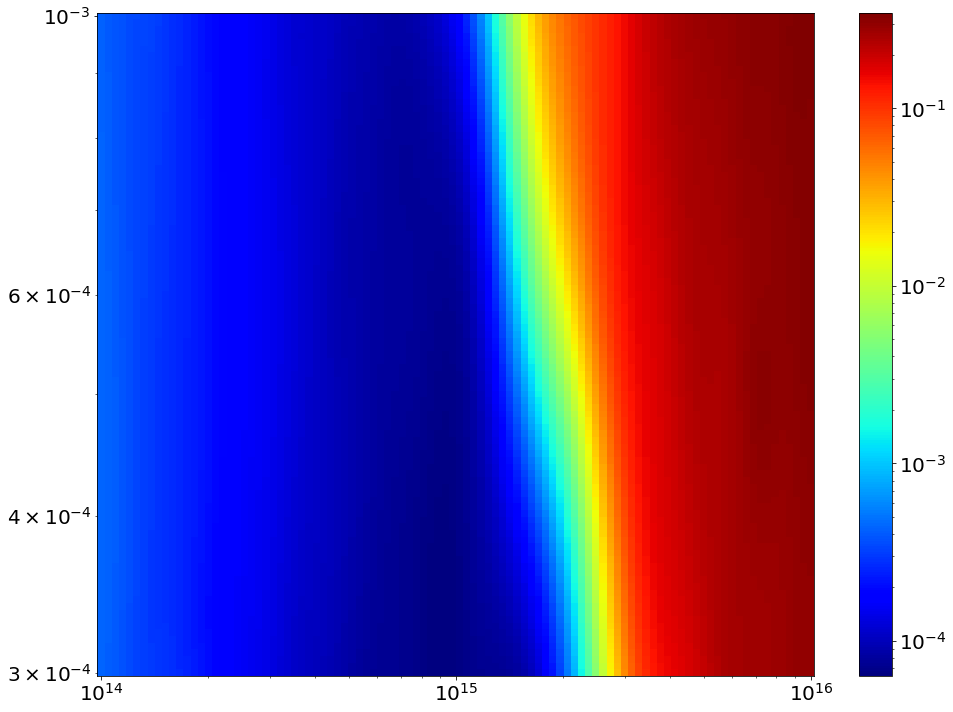

In [19]:
plt.pcolormesh(I_plot, Ln_plot, output.T, norm = LogNorm(vmin = output.min(), vmax = output.max()), cmap=plt.cm.jet,  shading ='auto')
plt.yscale('log')
plt.xscale('log')
plt.colorbar()

In [17]:
X1 = gp.X_train[:,0]
X2 = gp.X_train[:,1]


 /home/u1706745/.local/lib/python3.8/site-packages/matplotlib/collections.py:982: RuntimeWarning:invalid value encountered in sqrt


<function matplotlib.pyplot.colorbar(mappable=None, cax=None, ax=None, **kw)>

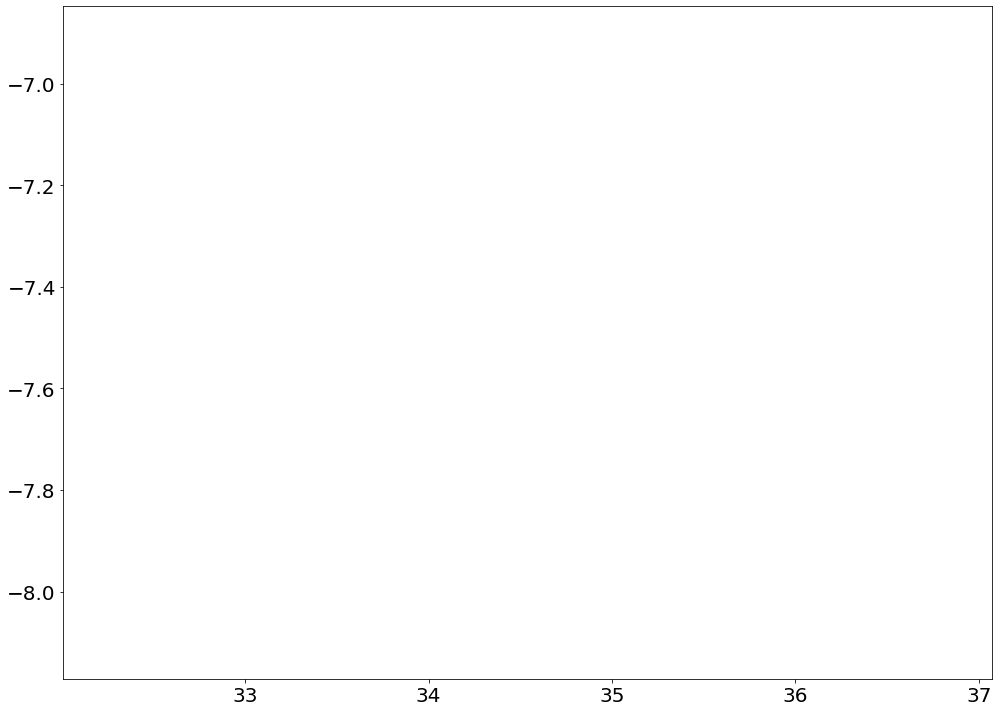

In [18]:
plt.scatter(X1, X2, gp.Y_train)
plt.colorbar